In [1]:
# imports
import pandas as pd
import numpy as np
import lightgbm
import sklearn.ensemble
import sklearn.tree
import sklearn
import matplotlib.pyplot
import math
import time

In [2]:
# LECTURA DE ARCHIVOS
bd_path = './'
bd_rul_filename = 'bd_rangos_variablesoperacionales.csv'

In [3]:
dfo = pd.read_csv(bd_path + bd_rul_filename, parse_dates = True)

In [4]:
var_DEVANADOS = ["tempDevanadoAfd11_1F1_cv05"
    ,"tempDevanadoAfd11_2F1_cv05"
    ,"DtempDevanadoAfd11_1F2_cv05"
    ,"DtempDevanadoAfd11_2F2_cv05"
    ,"DtempDevanadoAfd11_1F3_cv05"
    ,"DtempDevanadoAfd11_2F3_cv05"

    ,"tempDevanadoAfd12_1F1_cv05"
    ,"tempDevanadoAfd12_2F1_cv05"
    ,"DtempDevanadoAfd12_1F2_cv05"
    ,"DtempDevanadoAfd12_2F2_cv05"
    ,"DtempDevanadoAfd12_1F3_cv05"
    ,"DtempDevanadoAfd12_2F3_cv05"

    ,"tempDevanadoAfd21_1F1_cv05"
    ,"tempDevanadoAfd21_2F1_cv05"
    ,"DtempDevanadoAfd21_1F2_cv05"
    ,"DtempDevanadoAfd21_2F2_cv05"
    ,"DtempDevanadoAfd21_1F3_cv05"
    ,"DtempDevanadoAfd21_2F3_cv05"

    ,"tempDevanado_1F1_cv06_Afd12"
    ,"tempDevanado_2F1_cv06_Afd12"
    ,"DtempDevanado_1F2_cv06_Afd12"
    ,"DtempDevanado_2F2_cv06_Afd12"
    ,"DtempDevanado_1F3_cv06_Afd12"
    ,"DtempDevanado_2F3_cv06_Afd12"

    ,"tempDevanado_1F1_cv06_Afd21"
    ,"tempDevanado_2F1_cv06_Afd21"
    ,"DtempDevanado_1F2_cv06_Afd21"
    ,"DtempDevanado_2F2_cv06_Afd21"
    ,"DtempDevanado_1F3_cv06_Afd21"
    ,"DtempDevanado_2F3_cv06_Afd21"

    ,"tempDevanadoAfd11_1F1_cv07"
    ,"tempDevanadoAfd11_2F1_cv07"
    ,"DtempDevanadoAfd11_1F2_cv07"
    ,"DtempDevanadoAfd11_2F2_cv07"
    ,"DtempDevanadoAfd11_1F3_cv07"
    ,"DtempDevanadoAfd11_2F3_cv07"

    ,"tempDevanadoAfd21_1F1_cv07"
    ,"tempDevanadoAfd21_2F1_cv07"
    ,"DtempDevanadoAfd21_1F2_cv07"
    ,"DtempDevanadoAfd21_2F2_cv07"
    ,"DtempDevanadoAfd21_1F3_cv07"
    ,"DtempDevanadoAfd21_2F3_cv07"
           ]
var_AFD = ["TpH2_cv05"
    ,"torqueDriver11_cv05","torqueDriver12_cv05","torqueDriver21_cv05","torqueDriver22_cv05"
    ,"torqueDriverAfd12_cv06","torqueDriver21_cv06","torqueDriverAfd11_cv07","torqueDriver21_cv07"
    ,"potenciaActivaAfd11_cv05","potenciaActivaLinea1Afd12_cv05","potenciaActivaAfd21_cv05"
    ,"potenciaActivaAfd22_cv05","potenciaActivaLinea1Afd12_cv06","potenciaActiva21_cv06"
    ,"potenciaActivaAfd11_cv07","potenciaActiva21_cv07"
    ,"vibracion_DE_11_cv05","vibracion_DE_12_cv05","vibracion_DE_21_cv05","vibracion_DE_22_cv05"
    ,"vibracion_DE_12_cv06","vibracion_DE_21_cv06","vibreacionAfd11_DE_cv07","vibracionAfd21_DE_cv07"
    ,"vibracion_DN_11_cv05","vibracion_DN_12_cv05","vibracion_DN_21_cv05","vibracion_DN_22_cv05"
    ,"vibracion_DN_12_cv06","vibracion_DN_21_cv06","vibracionAfd11_DN_cv07","vibracionAfd21_DN_cv07"
    ,"torque11_cv05","torque12_cv05","torque21_cv05","torque22_cv05","torqueAfd12_cv06","torque21_cv06"
    ,"torque11_cv07","torque21_cv07"
    ,"corrienteMotor11_cv05","corrienteMotor12_cv05","corrienteMotor21_cv05","corrienteMotor22_cv05"
    ,"corrienteMotor12_cv06","corrienteMotor21_cv06","corrienteMotor11_cv07","corrienteMotor21_cv07"
    ,"corrienteLinea1Afd11_cv05","corrienteLinea1Afd12_cv05","corrienteLineaAfd21_cv05","corrienteLineaAfd22_cv05"
    ,"corrienteLinea1Afd12_cv06","corrienteLineaAfd21_cv06","corrienteLineaAfd11_cv07","corrienteLinea21_cv07"
    ,"tempFreno11_cv05","tempFreno12_cv05","tempFreno21_cv05","tempFreno22_cv05","tempFreno12_cV06"
    ,"tempFreno21_cv06","tempFreno22_cv06","tempFreno11_cv07","tempFreno21_cv07"
    ,"tempAceiteTrafoAfd11_cv05","tempAceiteTraffoAfd12_cv05","tempAceiteTrafoAfd21_cv05"
    ,"temperaturaAceiteTraffo_cv06_afd12","temperaturaAceiteTraffo_cv06_Afd21","tempAceiteTrafo11_cv07"
    ,"tempAceiteTrafoAfd21_cv07"
    ,"tempDescansoAfd11_DE_cv05","tempDescansoAfd12_DE_cv05","tempDescansoAfd21_DE_cv05"
    ,"temperaturaDescanso_DE_cv06_Afd12","temperaturaDescanso_DE_cv06_Afd21"
    ,"tempDescansoAfd11_DE_cv07","tempDescansoAfd21_DE_cv07"
    ,"tempDescansoAfd11_ND_cv05","tempDescansoAfd12_DN_cv05","tempDescansoAfd21_ND_cv05"
    ,"temperaturaDescanso_DN_cv06_afd12","temperaturaDescanso_DN_cv06_Afd21"
    ,"tempDescansoAfd11_DN_cv07","tempDescansoAfd21_DN_cv07"
    ,"tempAceiteAfd11_cv05","tempAceiteAfd12_cv05","TempAceite21","tempAceiteAfd12_cv06","red21_temp_aceite_cv06"
    ,"tempAceiteAfd11_cv07","tempAceite21_cv07"
    ,"tempRodamiento1Afd11_cv05","tempRodamiento1Afd12_cv05"
    ,"tempRodamientos1Afd12_cv06","red21_tempRodamientos1_cv06"
    ,"tempRodamiento1Afd11_cv07","tempRodamiento1Afd21_cv07"
    ,"tempRodamiento2Afd11_cv05","tempRodamiento2Afd12_cv05"
    ,"tempRodamientos2Afd12_cv06","red21_tempRodamientos2_cv06"
    ,"tempRodamiento2Afd11_cv07","tempRodamiento2Afd21_cv07"
          ]
var_RESTO = ["alimentacionFeeder_cv05"
    ,"tensionCeldaCargaIzq_cv05","tensionCeldaCargaIzq_cv06","tensionCeldaCargaIzq_cv07"
    ,"tensionCeldaCargaDer_cv05","tensionCeldaCargaDer_cv06","tensionCeldaCargaDer_cv07"
    ,"posicionContraPeso_cv05","posicionContrapeso_cv06"
    ,"potenciaTotalMotor_cv05","potenciaTotal_cv06","potenciaTotalMotor_cv07"
    ,"TpH2_cv05","pesometro_cv01","pesometro_cv701"
    ,"tempFreno31_cv05","tempFreno31_cv06","tempFreno31_cv07"
    ,"tempFreno32_cv05","tempFreno32_cv06"
    ,"presionFreno_cv05","presionFreno_cv06","presionFreno_cv07"
    ,"tempPolea1LadoDer_cv05","temperaturaPolea1LadoDer_cv06","tempPolea1LadoDer_cv07"
    ,"tempPolea1LadoIzq_cv05","temperaturaPolea1LadoIzq_cv06","tempPolea1LadoIzq_cv07"
    ,"tempPolea2LadoDer_cv05","temperaturaPolea2LadoDer_cv06","tempPolea2LadoDer_cv07"
    ,"tempPolea2LadoIzq_cv05","temperaturaPolea2LadoIzq_cv06","tempPolea2LadoIzq_cv07"
    ,"tempPolea3LadoDer_cv05","temperaturaPolea3LadoDer_cv06","tempPolea4LadoDer_cv07"
    ,"tempPolea3LadoIzq_cv05","temperaturaPolea3LadoIzq_cv06","tempPolea4LadoIzq_cv07"
    ,"tempPolea4LadoDer_cv05","temperaturaPolea4LadoDer_cv06","tempPolea5LadoDer_cv07"
    ,"tempPolea4LadoIzq_cv05","temperaturaPolea4LadoIzq_cv06","tempPolea5LadoIzq_cv07"
    ,"tempPolea5LadoDer_cv05","temperaturaPolea5LadoDer_cv06","tempPolea6LadoDer_cv07"
    ,"tempPolea5LadoIzq_cv05","temperaturaPolea5LadoIzq_cv06","tempPolea6LadoIzq_cv07"
    ,"tempPolea6LadoDer_cv05","tempPolea7LadoDer_cv07"
    ,"tempPolea6LadoIzq_cv05","tempPolea7LadoIzq_cv07"
    ,"tempPolea8LadoDer_cv07"
    ,"tempPolea8LadoIzq_cv07"
    ]

In [5]:
var_DEGRADATIONS = [var+" acumulado fuera de rango" for var in var_DEVANADOS+var_AFD+var_RESTO]
var_TDEGRADATIONS = [var+" tiempo fuera de rango" for var in var_DEVANADOS+var_AFD+var_RESTO]

In [6]:
# filtrado de datos para modelo
dfr = dfo[dfo["TpH2_cv05"]>800.0] # que este funcionando con tonelaje

In [24]:
# componentes principales
Xnames = ["falla anterior minutos"]+var_DEGRADATIONS+var_DEVANADOS+var_AFD+var_RESTO#+var_TDEGRADATIONS
dfr = dfr.dropna()
X_all = dfr[Xnames].values
X_all = sklearn.preprocessing.StandardScaler().fit_transform(X_all)
X_all = sklearn.decomposition.PCA(n_components=20).fit_transform(X_all)

In [26]:
seed = 7
test_size = 0.90
off_line = 0.33

Noff = int(len(X_all)*off_line)
X_on,y_on = X_all[:-Noff,:],dfr["falla futura minutos"].values[:-Noff]
X_off,y_off = X_all[-Noff:,:],dfr["falla futura minutos"].values[-Noff:]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_on,y_on
                                                           ,test_size=test_size, random_state=seed)
model = lightgbm.LGBMRegressor()
#model = xgboost.XGBRegressor(nthreads=4)
#model = sklearn.ensemble.AdaBoostRegressor()
#model = sklearn.ensemble.BaggingRegressor(n_jobs=4)
#model = sklearn.ensemble.RandomForestRegressor(n_jobs=4)
#model = sklearn.ensemble.GradientBoostingRegressor()
#model = sklearn.ensemble.ExtraTreesRegressor(n_jobs=4)
#model = sklearn.tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [31]:
importance = [(i,j) for (j,i) in enumerate(model.feature_importances_)]
importance.sort(key = lambda im: im[0])
importance = importance[::-1]
print('-------------------- variables ----------------------------')
for (i,n) in importance:
    if i>0.000001: print(round(i,3),':',n)

-------------------- variables ----------------------------
270 : 14
247 : 15
245 : 16
241 : 0
204 : 2
189 : 8
175 : 4
169 : 10
166 : 7
152 : 17
143 : 1
141 : 6
126 : 18
112 : 5
96 : 12
94 : 19
77 : 13
72 : 9
56 : 3
25 : 11


-------------------- train data ----------------------------
median_absolute_error: 1315.2527591795015
mean_absolute_error: 1843.7499814933135
max_error: 34419.36862351274
root_mean_squared_error: 2787.689949495295
explained_variance_score: 0.7872398900869044
r2_score: 0.7872398900869044


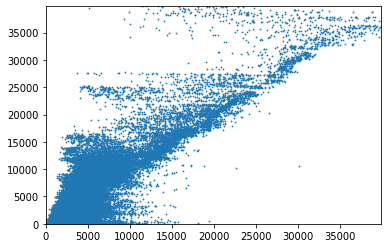

In [28]:
print('-------------------- train data ----------------------------')
y_real,y_pred = y_train,model.predict(X_train)
print('median_absolute_error:',sklearn.metrics.median_absolute_error(y_real, y_pred))
print('mean_absolute_error:',sklearn.metrics.mean_absolute_error(y_real, y_pred))
print('max_error:',sklearn.metrics.max_error(y_real, y_pred))
print('root_mean_squared_error:',math.sqrt(sklearn.metrics.mean_squared_error(y_real, y_pred)))
print('explained_variance_score:',sklearn.metrics.explained_variance_score(y_real, y_pred))
print('r2_score:',sklearn.metrics.r2_score(y_real, y_pred))
matplotlib.pyplot.scatter(y_pred,y_real,s=0.6)
matplotlib.pyplot.ylim(min(y_on),max(y_on))
matplotlib.pyplot.xlim(min(y_on),max(y_on))
matplotlib.pyplot.show()

-------------------- test data ----------------------------
median_absolute_error: 1340.6898291124617
mean_absolute_error: 1930.716282008873
max_error: 36796.603148376256
root_mean_squared_error: 2996.401656721602
explained_variance_score: 0.7495893938028948
r2_score: 0.74958901322941


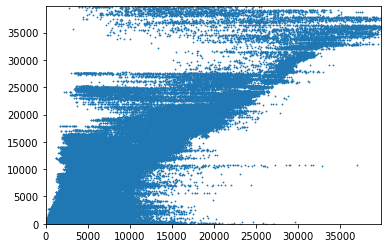

In [29]:
print('-------------------- test data ----------------------------')
y_real,y_pred = y_test,model.predict(X_test)
print('median_absolute_error:',sklearn.metrics.median_absolute_error(y_real, y_pred))
print('mean_absolute_error:',sklearn.metrics.mean_absolute_error(y_real, y_pred))
print('max_error:',sklearn.metrics.max_error(y_real, y_pred))
print('root_mean_squared_error:',math.sqrt(sklearn.metrics.mean_squared_error(y_real, y_pred)))
print('explained_variance_score:',sklearn.metrics.explained_variance_score(y_real, y_pred))
print('r2_score:',sklearn.metrics.r2_score(y_real, y_pred))
matplotlib.pyplot.scatter(y_pred,y_real,s=0.6)
matplotlib.pyplot.ylim(min(y_on),max(y_on))
matplotlib.pyplot.xlim(min(y_on),max(y_on))
matplotlib.pyplot.show()